# Machine Learning Modeling

- Feature selection 
- Pra-Modeling
    - Pemisahan variabel target dan prediktor
    - Penanganan variabel kategorik (encoding)
    - Standarisasi variabel numerik
    - Train-test split

- Modeling (Random Forest & XGBoost)
    - Base model
    - Hyper-parameter tuning (Grid Search)

- Evaluation
    - Perbandingan nilai MAE/RMSE/MSE/MAPE untuk kedua model (Random Forest & XGBoost)
    
- Feature importance (Model terbaik)

In [84]:
!python --version

Python 3.9.0


## Machine Learning Workflow

Dalam sebuah project machine learning ada tahapan-tahapan yang perlu dilalui sebelum project tersebut bisa melakukan prediksi terhadap data `real world`.  Tahapan-tahapan yang dimaksud adalah sebagai berikut:

<div>
<img src="pic/MLFlow.png"/>
</div>

In [85]:
# Read Data
import pandas as pd
df = pd.read_csv("data_modeling.csv", index_col=0)
df.head()

,Link,Nama,Lokasi,Harga,Jenis,Listrik,Luas Kamar,K Mandi Dalam,AC,WiFi,Kasur,Akses 24 Jam,Panjang Kamar,Lebar Kamar,Latitude,Longitude,Kampus Terdekat,Jarak ke Kampus Terdekat,Kelompok Kampus
0,https://mamikos.com/room/kost-kota-surabaya-ko...,Kost Singgahsini Rungkut Asri Utara XI Tipe C ...,Rungkut,880000,Putri,Tidak termasuk listrik,5.0,No,No,Yes,Yes,Yes,2.0,2.5,-7.323245,112.77409,UPN,1.922106,UPN
1,https://mamikos.com/room/kost-kota-surabaya-ko...,Kost Singgahsini Rungkut Asri Utara XI Tipe A ...,Rungkut,1275000,Putri,Tidak termasuk listrik,5.0,No,Yes,Yes,Yes,Yes,2.0,2.5,-7.323245,112.77409,UPN,1.922106,UPN
2,https://mamikos.com/room/kost-kota-surabaya-ko...,Kost Singgahsini Rungkut Asri Utara XI Tipe B ...,Rungkut,925000,Putri,Tidak termasuk listrik,6.0,No,No,Yes,Yes,Yes,2.0,3.0,-7.323245,112.77409,UPN,1.922106,UPN
3,https://mamikos.com/room/kost-kota-surabaya-ko...,Kost Singgahsini Rabbani Syariah Tipe A Rungku...,Rungkut,2525000,Putri,Tidak termasuk listrik,20.0,Yes,Yes,Yes,Yes,Yes,5.0,4.0,-7.319905,112.79770,UPN,1.747229,UPN
4,https://mamikos.com/room/kost-kota-surabaya-ko...,Kost Singgahsini Rabbani Syariah Tipe C Rungku...,Rungkut,2025000,Putri,Tidak termasuk listrik,16.0,Yes,Yes,Yes,Yes,Yes,4.0,4.0,-7.319905,112.79770,UPN,1.747229,UPN


In [86]:
df.columns

Index(['Link', 'Nama', 'Lokasi', 'Harga', 'Jenis', 'Listrik', 'Luas Kamar',
       'K Mandi Dalam', 'AC', 'WiFi', 'Kasur', 'Akses 24 Jam', 'Panjang Kamar',
       'Lebar Kamar', 'Latitude', 'Longitude', 'Kampus Terdekat',
       'Jarak ke Kampus Terdekat', 'Kelompok Kampus'],
      dtype='object')

In [87]:
df = df[["Lokasi", "Jenis", "Listrik", "K Mandi Dalam", "AC", "WiFi", "Kasur", "Akses 24 Jam", "Kampus Terdekat", 
         "Jarak ke Kampus Terdekat", "Luas Kamar", "Harga"]]

df.head()

,Lokasi,Jenis,Listrik,K Mandi Dalam,AC,WiFi,Kasur,Akses 24 Jam,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Harga
0,Rungkut,Putri,Tidak termasuk listrik,No,No,Yes,Yes,Yes,UPN,1.922106,5.0,880000
1,Rungkut,Putri,Tidak termasuk listrik,No,Yes,Yes,Yes,Yes,UPN,1.922106,5.0,1275000
2,Rungkut,Putri,Tidak termasuk listrik,No,No,Yes,Yes,Yes,UPN,1.922106,6.0,925000
3,Rungkut,Putri,Tidak termasuk listrik,Yes,Yes,Yes,Yes,Yes,UPN,1.747229,20.0,2525000
4,Rungkut,Putri,Tidak termasuk listrik,Yes,Yes,Yes,Yes,Yes,UPN,1.747229,16.0,2025000


## Feature Selection

In [88]:
df_fs = df.copy()
df_fs.head()

,Lokasi,Jenis,Listrik,K Mandi Dalam,AC,WiFi,Kasur,Akses 24 Jam,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Harga
0,Rungkut,Putri,Tidak termasuk listrik,No,No,Yes,Yes,Yes,UPN,1.922106,5.0,880000
1,Rungkut,Putri,Tidak termasuk listrik,No,Yes,Yes,Yes,Yes,UPN,1.922106,5.0,1275000
2,Rungkut,Putri,Tidak termasuk listrik,No,No,Yes,Yes,Yes,UPN,1.922106,6.0,925000
3,Rungkut,Putri,Tidak termasuk listrik,Yes,Yes,Yes,Yes,Yes,UPN,1.747229,20.0,2525000
4,Rungkut,Putri,Tidak termasuk listrik,Yes,Yes,Yes,Yes,Yes,UPN,1.747229,16.0,2025000


In [89]:
df_fs.dtypes

Lokasi                       object
Jenis                        object
Listrik                      object
K Mandi Dalam                object
AC                           object
WiFi                         object
Kasur                        object
Akses 24 Jam                 object
Kampus Terdekat              object
Jarak ke Kampus Terdekat    float64
Luas Kamar                  float64
Harga                         int64
dtype: object

**Korelasi Poin Biserial**

Korelasi Poin Biserial adalah versi khusus dari korelasi Pearson yang digunakan ketika salah satu variabel bersifat numerik dan yang lain bersifat kategorik biner (misalnya 0 dan 1). Dalam case ini, akan dilakukan pengecekan korelasi `6 variabel kategorik biner` (Listrik, K.Mandi Dalam, AC, WiFi, Kasur, Akses 24 Jam) terhadap variabel `harga`. Untuk menggunakan Point Biserial Correlation, variabel kategorik biner harus diubah menjadi nilai numerik (misalnya Yes menjadi 1 dan No menjadi 0).

In [90]:
from scipy.stats import pointbiserialr

# Mengonversi variabel biner ke numerik
df_fs['Listrik'] = df_fs['Listrik'].map({'Termasuk listrik': 1, 'Tidak termasuk listrik': 0})
df_fs['K Mandi Dalam'] = df_fs['K Mandi Dalam'].map({'Yes': 1, 'No': 0})
df_fs['AC'] = df_fs['AC'].map({'Yes': 1, 'No': 0})
df_fs['WiFi'] = df_fs['WiFi'].map({'Yes': 1, 'No': 0})
df_fs['Kasur'] = df_fs['Kasur'].map({'Yes': 1, 'No': 0})
df_fs['Akses 24 Jam'] = df_fs['Akses 24 Jam'].map({'Yes': 1, 'No': 0})

In [91]:
df_fs

,Lokasi,Jenis,Listrik,K Mandi Dalam,AC,WiFi,Kasur,Akses 24 Jam,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Harga
0,Rungkut,Putri,0,0,0,1,1,1,UPN,1.922106,5.0,880000
1,Rungkut,Putri,0,0,1,1,1,1,UPN,1.922106,5.0,1275000
2,Rungkut,Putri,0,0,0,1,1,1,UPN,1.922106,6.0,925000
3,Rungkut,Putri,0,1,1,1,1,1,UPN,1.747229,20.0,2525000
4,Rungkut,Putri,0,1,1,1,1,1,UPN,1.747229,16.0,2025000
...,...,...,...,...,...,...,...,...,...,...,...,...
661,Sukolilo,Putra,0,1,1,1,1,1,ITS Kampus Sukolilo,1.702362,7.5,1750000
662,Mulyorejo,Putra,0,0,0,0,1,1,UNAIR Kampus Merr C,0.952267,6.0,550000
663,Sukolilo,Putri,0,1,1,1,1,1,ITS Kampus Sukolilo,1.849136,12.0,2599999
664,Sukolilo,Putra,0,1,1,1,1,1,ITS Kampus Sukolilo,1.216275,9.0,1600000


In [92]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lokasi                    666 non-null    object 
 1   Jenis                     666 non-null    object 
 2   Listrik                   666 non-null    int64  
 3   K Mandi Dalam             666 non-null    int64  
 4   AC                        666 non-null    int64  
 5   WiFi                      666 non-null    int64  
 6   Kasur                     666 non-null    int64  
 7   Akses 24 Jam              666 non-null    int64  
 8   Kampus Terdekat           666 non-null    object 
 9   Jarak ke Kampus Terdekat  666 non-null    float64
 10  Luas Kamar                666 non-null    float64
 11  Harga                     666 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 67.6+ KB


In [93]:
# Variabel yang akan dicek
biner_columns = ['Listrik', 'K Mandi Dalam', 'AC', 'WiFi', 'Kasur', 'Akses 24 Jam']

# Menghitung Point Biserial Correlation untuk setiap variabel
for column in biner_columns:
    correlation, p_value = pointbiserialr(df_fs[column], df_fs['Harga'])
    print(f"Korelasi Point Biserial antara Harga dan {column}:")
    print(f"Correlation: {correlation}")
    print(f"P-value: {p_value}\n")

Korelasi Point Biserial antara Harga dan Listrik:
Correlation: -0.3030742756486014
P-value: 1.2900312587583784e-15

Korelasi Point Biserial antara Harga dan K Mandi Dalam:
Correlation: 0.4702522392366225
P-value: 6.0414263473812e-38

Korelasi Point Biserial antara Harga dan AC:
Correlation: 0.720122156215407
P-value: 1.7057513303895597e-107

Korelasi Point Biserial antara Harga dan WiFi:
Correlation: 0.188936211304523
P-value: 9.060816107149308e-07

Korelasi Point Biserial antara Harga dan Kasur:
Correlation: 0.07669948651794578
P-value: 0.04786344846237116

Korelasi Point Biserial antara Harga dan Akses 24 Jam:
Correlation: 0.07106897201880016
P-value: 0.06681028907589039



Berdasarkan hasil korelasi Point Biserial yang telah dihitung, kita bisa menganalisis variabel mana yang memiliki korelasi kuat dengan variabel target (Harga) dan mana yang memiliki korelasi lemah. Umumnya, dalam konteks machine learning, fitur dengan korelasi rendah terhadap target bisa dipertimbangkan untuk dihapus, terutama jika korelasi tersebut tidak signifikan secara statistik.

- H0: Tidak ada korelasi yang signifikan antara variabel biner dengan harga sewa

`Jika P-value < 0.05, maka tolak H0` 

Dari nilai korelasi dan p-value diatas, kita dapat mempertimbangkan untuk **menghapus variabel Kasur dan Akses 24 Jam** karena korelasi variabel tsb sangat lemah terhadap harga, terutama Akses 24 Jam tidak signifikan secara statistik.

C:\Users\User\AppData\Local\Temp\ipykernel_2968\2965086700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kasur', y='Harga', data=df, palette='Set2')


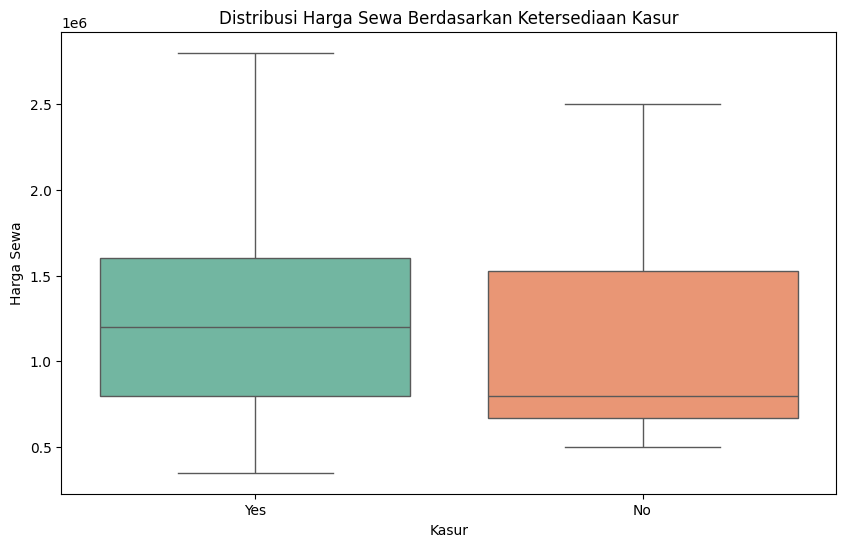

C:\Users\User\AppData\Local\Temp\ipykernel_2968\2965086700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Akses 24 Jam', y='Harga', data=df, palette='Set2')


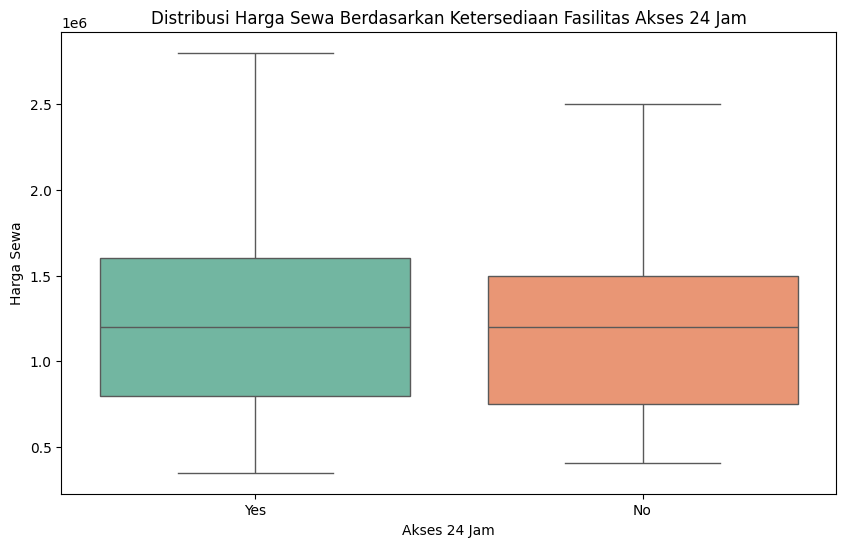

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot sebaran harga sewa terhadap ketersediaan Kasur
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kasur', y='Harga', data=df, palette='Set2')
plt.title('Distribusi Harga Sewa Berdasarkan Ketersediaan Kasur')
plt.xlabel('Kasur')
plt.ylabel('Harga Sewa')
plt.show()

# Boxplot sebaran harga sewa terhadap ketersediaan fasilitas Akses 24 Jam
plt.figure(figsize=(10, 6))
sns.boxplot(x='Akses 24 Jam', y='Harga', data=df, palette='Set2')
plt.title('Distribusi Harga Sewa Berdasarkan Ketersediaan Fasilitas Akses 24 Jam')
plt.xlabel('Akses 24 Jam')
plt.ylabel('Harga Sewa')
plt.show()

**Distribusi Harga Sewa Berdasarkan Kategori Jenis Kos**

C:\Users\User\AppData\Local\Temp\ipykernel_2968\976657823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis', y='Harga', data=df, palette='Set2')


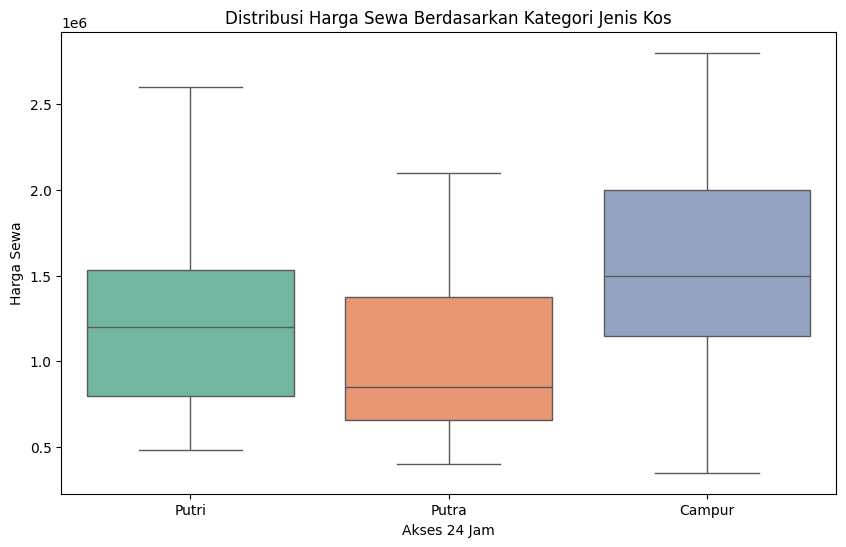

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis', y='Harga', data=df, palette='Set2')
plt.title('Distribusi Harga Sewa Berdasarkan Kategori Jenis Kos')
plt.xlabel('Akses 24 Jam')
plt.ylabel('Harga Sewa')
plt.show()

Dari boxplot diatas tampak ada perbedaan harga indekos berdasarkan jenis kos dimana kos Campur cenderung memiliki harga sewa yang lebih mahal dibandingkan kos Putri dan Putra. Oleh karena itu, dapat diketahui sekilas bahwa jenis indekos juga turut mempengaruhi harga sewa. Sehingga, dalam case ini variabel Jenis tetap dipertahankan untuk digunakan saat pemodelan.

**Scatter Plot Hubungan Variabel Luas Kamar dengan Harga**

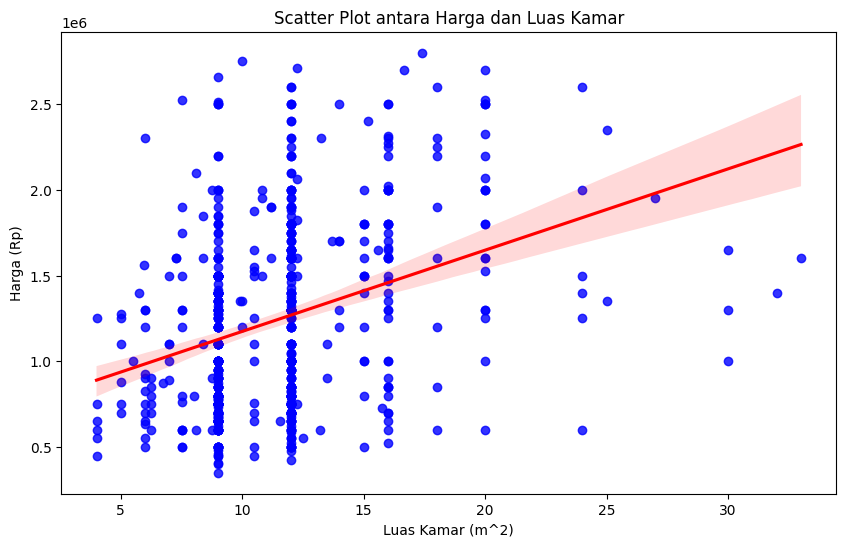

In [96]:
# Scatter plot antara Harga dan Luas Kamar dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='Luas Kamar', y='Harga', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Scatter Plot antara Harga dan Luas Kamar')
plt.xlabel('Luas Kamar (m^2)')
plt.ylabel('Harga (Rp)')
plt.show()

In [97]:
# Korelasi antara Harga dan Luas Kamar
cor = df['Harga'].corr(df['Luas Kamar'])
cor

np.float64(0.3364071710783274)

Scatter plot diatas menunjukkan bahwa terdapat hubungan positif antara Luas Kamar dan Harga. Artinya, ketika Luas Kamar meningkat, harga sewa juga cenderung meningkat. Oleh karna itu, variabel Luas Kamar akan tetap dipertahankan dan digunakan dalam pemodelan.

## Pra-Modeling

In [98]:
df.columns

Index(['Lokasi', 'Jenis', 'Listrik', 'K Mandi Dalam', 'AC', 'WiFi', 'Kasur',
       'Akses 24 Jam', 'Kampus Terdekat', 'Jarak ke Kampus Terdekat',
       'Luas Kamar', 'Harga'],
      dtype='object')

Dari proses sebelumnya, ada 2 variabel yang tereliminasi yakni variabel ketersediaan Kasur dan fasilitas Akses 24 Jam. Selain itu variabel Lokasi nantinya tidak akan digunakan dalam pemodelan karena sebenarnya secara tidak langsung sudah diwakili oleh variabel Kampus Terdekat dan Jarak ke Kampus Terdekat.


Sehingga tersisa 9 variabel yang akan digunakan dalam proses berikutnya yakni Jenis, Listrik, K Mandi Dalam, AC, WiFi, Kampus Terdekat, Jarak ke Kampus Terdekat, Luas Kamar, dan Harga.

In [99]:
df_m = df[['Jenis', 'Listrik', 'K Mandi Dalam', 'AC', 'WiFi', 'Kampus Terdekat', 'Jarak ke Kampus Terdekat',
       'Luas Kamar', 'Harga']]

df_m.head()

,Jenis,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Harga
0,Putri,Tidak termasuk listrik,No,No,Yes,UPN,1.922106,5.0,880000
1,Putri,Tidak termasuk listrik,No,Yes,Yes,UPN,1.922106,5.0,1275000
2,Putri,Tidak termasuk listrik,No,No,Yes,UPN,1.922106,6.0,925000
3,Putri,Tidak termasuk listrik,Yes,Yes,Yes,UPN,1.747229,20.0,2525000
4,Putri,Tidak termasuk listrik,Yes,Yes,Yes,UPN,1.747229,16.0,2025000


### Pemisahan Target dan Prediktor

In [100]:
# Pemisahan variabel target dan prediktor
X = df_m.drop('Harga', axis=1)
y = df_m['Harga']

In [101]:
X.tail()

,Jenis,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar
661,Putra,Tidak termasuk listrik,Yes,Yes,Yes,ITS Kampus Sukolilo,1.702362,7.5
662,Putra,Tidak termasuk listrik,No,No,No,UNAIR Kampus Merr C,0.952267,6.0
663,Putri,Tidak termasuk listrik,Yes,Yes,Yes,ITS Kampus Sukolilo,1.849136,12.0
664,Putra,Tidak termasuk listrik,Yes,Yes,Yes,ITS Kampus Sukolilo,1.216275,9.0
665,Putra,Tidak termasuk listrik,Yes,Yes,Yes,ITS Kampus Sukolilo,1.216275,12.0


In [102]:
y.tail()

661    1750000
662     550000
663    2599999
664    1600000
665    1400000
Name: Harga, dtype: int64

### Menangani Data Kategorikal: Encoding

Di Python, data input dan output untuk pemodel *machine learning* harus berbentuk numeric. Ini berarti, ketika data kita mempunyai nilai kategorikal, harus di-*encode* menjadi numerik sebelum dimasukkan ke dalam pemodelan dan evaluasi machine learning.

Tipe data kategorikal terbagi menjadi dua, yaitu:

1. Nominal: Tipe kategorikal yang tidak memiliki hubungan antara kategori satu dengan yang lainnya. Contoh: kota (Jakarta, Makassar, Bandung), warna (biru, putih, hitam), hewan (kucing, sapi, "masbro").

2. Ordinal: Tipe kategorikal yang memiliki hubungan bertingkat. Contoh: tingkat pendidikan (s1, s2, s3), tingkat kepuasan (kecewa, netral, puas), pengalaman kerja (junior, mid, senior).

In [103]:
# Mengonversi variabel nominal biner ke numerik
X['Listrik'] = X['Listrik'].map({'Termasuk listrik': 1, 'Tidak termasuk listrik': 0})
X['K Mandi Dalam'] = X['K Mandi Dalam'].map({'Yes': 1, 'No': 0})
X['AC'] = X['AC'].map({'Yes': 1, 'No': 0})
X['WiFi'] = X['WiFi'].map({'Yes': 1, 'No': 0})


Dalam data yang kita punya, variabel Jenis merupakan variabel kategorik **nominal** dengan 3 kategori yang tidak menunjukkan tingkatan. Oleh karena itu, variabel ini akan di-*encoding* dengan Dummy Variable Encoding.

In [104]:
X = pd.get_dummies(data = X, columns = ['Jenis'], drop_first = True, dtype = int)

X.tail()

,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Jenis_Putra,Jenis_Putri
661,0,1,1,1,ITS Kampus Sukolilo,1.702362,7.5,1,0
662,0,0,0,0,UNAIR Kampus Merr C,0.952267,6.0,1,0
663,0,1,1,1,ITS Kampus Sukolilo,1.849136,12.0,0,1
664,0,1,1,1,ITS Kampus Sukolilo,1.216275,9.0,1,0
665,0,1,1,1,ITS Kampus Sukolilo,1.216275,12.0,1,0


Untuk variabel Kampus Terdekat akan dilakukan label Encoder meskipun variabel ini sebenarnya tidak menunjukkan tingkatan. Hal ini dilakukan karena terdapat 9 kategori Kampus Terdekat yang dirasa akan membuat data semakin kompleks jika dilakukan dummy encoding.

In [105]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

X['Kampus Terdekat'] = label_encoder.fit_transform(X['Kampus Terdekat'])

X.tail()

,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Jenis_Putra,Jenis_Putri
661,0,1,1,1,2,1.702362,7.5,1,0
662,0,0,0,0,5,0.952267,6.0,1,0
663,0,1,1,1,2,1.849136,12.0,0,1
664,0,1,1,1,2,1.216275,9.0,1,0
665,0,1,1,1,2,1.216275,12.0,1,0


### Standarisasi Variabel Numerik

In [106]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Fit scaler pada kolom yang ingin distandarisasi
scaler.fit(X[["Jarak ke Kampus Terdekat", "Luas Kamar"]])

# Terapkan transformasi standar ke kolom-kolom tersebut
X[["Jarak ke Kampus Terdekat", "Luas Kamar"]] = scaler.transform(X[["Jarak ke Kampus Terdekat", "Luas Kamar"]])

# Membulatkan nilai hasil transformasi ke 5 angka di belakang koma
X[["Jarak ke Kampus Terdekat", "Luas Kamar"]] = np.round(X[["Jarak ke Kampus Terdekat", "Luas Kamar"]], 5)


In [107]:
X.tail()

,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Jenis_Putra,Jenis_Putri
661,0,1,1,1,2,0.70209,-1.02093,1,0
662,0,0,0,0,5,-0.53900,-1.41167,1,0
663,0,1,1,1,2,0.94494,0.15128,0,1
664,0,1,1,1,2,-0.10217,-0.63019,1,0
665,0,1,1,1,2,-0.10217,0.15128,1,0


In [108]:
import pickle

# Menyimpan scaler ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### Train-test split

In [109]:
# split dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15, # 85% training and 15% test
                                                    random_state=123)

In [110]:
X_train.shape

(566, 9)

In [111]:
X_test.shape

(100, 9)

## Model Building

Pemilihan model adalah hal penting dalam pembuatan projek Machine Learning, baik itu klasifikasi ataupun regresi. Untuk meningkatkan performa model salah satu strateginya adalah dengan menyatukan berbagai macam model Machine Learning. Strategi ini disebut sebagai **Ensemble Learning**. **Ensemble Learning** adalah metode di mana beberapa algoritma digunakan secara bersamaan kemudian dikombinasikan. 

2 jenis **Ensemble Learning** yang sering digunakan adalah **Bagging** dan **Boosting**

1. **Bagging** adalah jenis ensemble learning yang melatih banyak model dengan data yang berbeda-beda, kemudian mengambil nilai prediksi rata-rata/mayoritas dari model-model yang dilatih. Salah satu contoh Algoritma yang menggunakan **Bagging** method ini adalah Random Forest.

<div>
<img src="pic/bagging.png" width="600"/>
</div>

2. **Boosting** adalah jenis ensemble learning yang menggunakan output dari model sebelumnya untuk sebagai input untuk model selanjutnya. Metode **boosting** melatih model secara berurutan, setiap model dilatih untuk memperbaiki kesalahan dari model sebelumnya.

<div>
<img src="pic/boosting.png" width="600"/>
</div>

### Decision Tree

#### Base Model Decision Tree

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [112]:
# Inisialisasi model Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=123)

In [113]:
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [114]:
# Prediksi pada data uji
y_pred_dt_model = dt_model.predict(X_test)

In [156]:
# Evaluasi performa model
import numpy as np
r2_base_dt = r2_score(y_test, y_pred_dt_model)
mape_base_dt = mean_absolute_percentage_error(y_test, y_pred_dt_model) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_base_dt:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_base_dt:.2f}%")

R-squared (R2): 0.47
Mean Absolute Percentage Error (MAPE): 24.67%


In [116]:
# Mendapatkan parameter default
default_params_dt = dt_model.get_params()

# Menampilkan parameter default
for param, value in default_params_dt.items():
    print(f'{param}: {value}')

ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 123
splitter: best


#### Hyperparameter Tuning Decision Tree

In [117]:
param_grid_dt = {
    'max_depth': [5, 10, 15, None],          # Mengontrol kedalaman maksimum dari tree
    'min_samples_split': [2, 5, 10, 20],  # Jumlah minimum sampel yang diperlukan untuk split node
    'min_samples_leaf': [1, 2, 5],     # Jumlah minimum sampel pada leaf node
    'max_features': ['sqrt', 'log2', None],  # Jumlah maksimum fitur yang dipertimbangkan untuk split
}

# Inisialisasi GridSearchCV dengan model dan grid parameter
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, verbose=1, n_jobs=-1, error_score='raise')

In [118]:
# Train GridSearchCV
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


d:\New\Training\BisaAI\Sertifikasi BNSP\Project I\myenv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=1)

In [119]:
# Best Params
grid_search_dt.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [120]:
# Prediksi pada data uji dengan model terbaik
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt_best = best_model_dt.predict(X_test)

In [157]:
# Evaluasi performa model
r2_dt_best_test = r2_score(y_test, y_pred_dt_best)
mape_dt_best_test = mean_absolute_percentage_error(y_test, y_pred_dt_best) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_dt_best_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt_best_test:.2f}%")


R-squared (R2): 0.61
Mean Absolute Percentage Error (MAPE): 20.17%


#### Prediksi Data Train

In [159]:
y_pred_dt_best_train = best_model_dt.predict(X_train)

r2_dt_best_train = r2_score(y_train, y_pred_dt_best_train)
mape_dt_best_train = mean_absolute_percentage_error(y_train, y_pred_dt_best_train) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_dt_best_train:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt_best_train:.2f}%")

R-squared (R2): 0.63
Mean Absolute Percentage Error (MAPE): 20.14%


In [123]:
X_test.head()

,Listrik,K Mandi Dalam,AC,WiFi,Kampus Terdekat,Jarak ke Kampus Terdekat,Luas Kamar,Jenis_Putra,Jenis_Putri
276,1,0,1,0,5,-0.71509,0.15128,0,1
431,1,1,0,1,6,-0.03100,0.15128,0,0
320,1,0,0,1,2,0.62457,-0.69532,1,0
557,0,1,1,0,1,1.46209,-0.63019,0,0
242,1,0,0,1,3,-0.98114,-0.63019,0,1


In [124]:
y_test.head()

276    1350000
431     850000
320     600000
557    2660000
242     480000
Name: Harga, dtype: int64

In [125]:
y_pred_dt_best_train[:5]

array([1266951.2195122 , 1501544.11764706,  787500.        ,
       1786080.        ,  840909.09090909])

### Random Forest

#### Base Model Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)

In [127]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [128]:
# Prediksi pada data uji
y_pred_rf_model = rf_model.predict(X_test)

In [163]:
r2_base_rf = r2_score(y_test, y_pred_rf_model)
mape_base_rf = mean_absolute_percentage_error(y_test, y_pred_rf_model) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_base_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_base_rf:.2f}%")

R-squared (R2): 0.67
Mean Absolute Percentage Error (MAPE): 18.36%


In [130]:
# Mendapatkan parameter default
default_params_rf = rf_model.get_params()

# Menampilkan parameter default
for param, value in default_params_rf.items():
    print(f'{param}: {value}')

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 123
verbose: 0
warm_start: False


#### Hyperparameter Tuning Random Forest

In [131]:
param_grid_rf = {
    'max_depth': [5, 15, None],         
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5], 
    'max_features': [None, 'sqrt', 'log2'], 
    'n_estimators': [100, 200] # Jumlah pohon
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1)

In [132]:
# Train GridSearchCV
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 15, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=1)

In [133]:
# Best Params
grid_search_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [134]:
# Prediksi pada data uji dengan model terbaik
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_model_rf.predict(X_test)

In [164]:
# Evaluasi performa model
r2_rf_best_test = r2_score(y_test, y_pred_rf_best)
mape_rf_best_test = mean_absolute_percentage_error(y_test, y_pred_rf_best) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_rf_best_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf_best_test:.2f}%")

R-squared (R2): 0.67
Mean Absolute Percentage Error (MAPE): 18.58%


#### Prediksi Data Train

In [165]:
y_pred_rf_best_train = best_model_rf.predict(X_train)

# Evaluasi performa model
r2_rf_best_train = r2_score(y_train, y_pred_rf_best_train)
mape_rf_best_train = mean_absolute_percentage_error(y_train, y_pred_rf_best_train) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_rf_best_train:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf_best_train:.2f}%")

R-squared (R2): 0.81
Mean Absolute Percentage Error (MAPE): 14.75%


### XGBoost

#### Base Model XGBoost

In [137]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=123)

In [138]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [139]:
# Prediksi pada data uji
y_pred_xgb_model = xgb_model.predict(X_test)

In [166]:
# Evaluasi performa model
r2_base_xgb = r2_score(y_test, y_pred_xgb_model)
mape_base_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb_model) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_base_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_base_xgb:.2f}%")

R-squared (R2): 0.70
Mean Absolute Percentage Error (MAPE): 20.28%


In [141]:
# Mendapatkan parameter default
default_params_xgb = xgb_model.get_params()

# Menampilkan parameter default
for param, value in default_params_xgb.items():
    print(f'{param}: {value}')

objective: reg:squarederror
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: 123
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


#### Hyperparameter Tuning XGBoost

In [142]:
param_grid_xgb = {"max_depth":[3, 6, 9],
               "learning_rate": [0.01, 0.3, 0.2],
               "n_estimators":[100, 150, 200, 300],
                 'subsample': [0.7, 0.8, 1.0]}


# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)

In [143]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=123, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.3, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 150, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             verbose=1)

In [144]:
# Best Params
grid_search_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}

In [145]:
# Prediksi pada data uji dengan model terbaik
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_model_xgb.predict(X_test)

In [168]:
# Evaluasi performa model
r2_xgb_best_test = r2_score(y_test, y_pred_xgb_best)
mape_xgb_best_test = mean_absolute_percentage_error(y_test, y_pred_xgb_best) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_xgb_best_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb_best_test:.2f}%")

R-squared (R2): 0.62
Mean Absolute Percentage Error (MAPE): 19.55%


### Prediksi Data Train

In [169]:
y_pred_xgb_best_train = best_model_xgb.predict(X_train)

# Evaluasi performa model
r2_xgb_best_train = r2_score(y_train, y_pred_xgb_best_train)
mape_xgb_best_train = mean_absolute_percentage_error(y_train, y_pred_xgb_best_train) * 100

# Cetak hasil evaluasi
print(f"R-squared (R2): {r2_xgb_best_train:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb_best_train:.2f}%")

R-squared (R2): 0.67
Mean Absolute Percentage Error (MAPE): 19.51%


In [193]:
y_test.head(10)

276    1350000
431     850000
320     600000
557    2660000
242     480000
628     600000
169     750000
549    1600000
261    1300000
379    1500000
Name: Harga, dtype: int64

In [195]:
y_pred_xgb_best[:10]

array([1347008.4 ,  933270.  ,  678717.94, 1476297.8 ,  850340.56,
        682352.  ,  867455.7 , 1660117.2 , 1313103.8 , 1498171.4 ],
      dtype=float32)

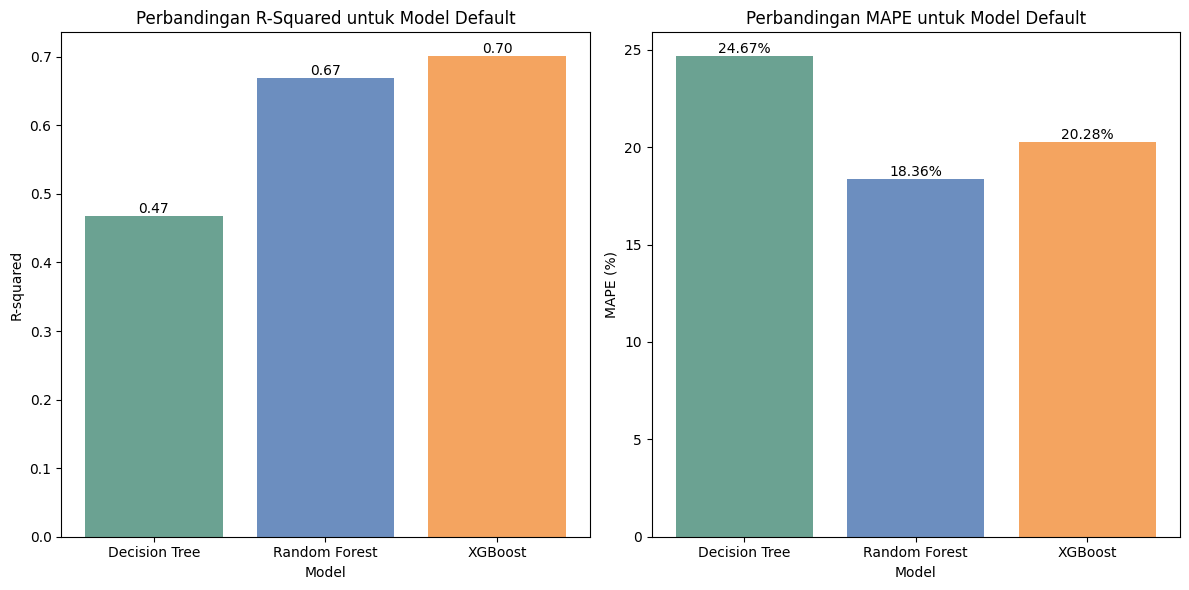

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Hasil evaluasi model
r2_scores = [r2_base_dt, r2_base_rf, r2_base_xgb]
mape_scores = [mape_base_dt, mape_base_rf, mape_base_xgb]

model_names = ['Decision Tree', 'Random Forest', 'XGBoost']

colors = ['#6ba292', '#6c8ebf', '#f4a460']

# Plot R-squared
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
bars1 = plt.bar(model_names, r2_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Perbandingan R-Squared untuk Model Default')

# Tambahkan nilai di atas batang R-squared
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Plot MAPE
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
bars2 = plt.bar(model_names, mape_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('MAPE (%)')
plt.title('Perbandingan MAPE untuk Model Default')

# Tambahkan nilai di atas batang MAPE
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Tampilkan plot
plt.tight_layout()
plt.show()


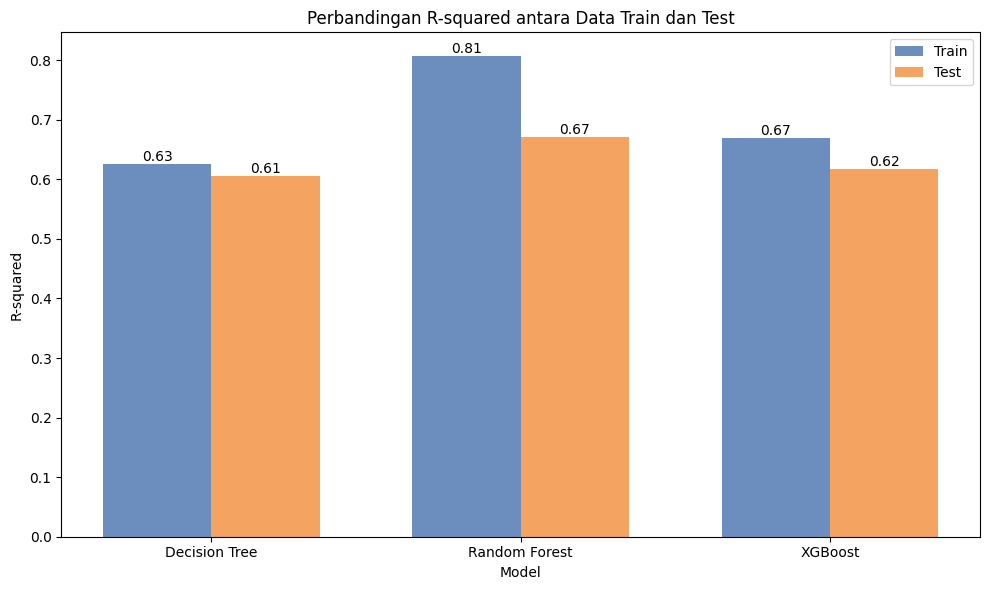

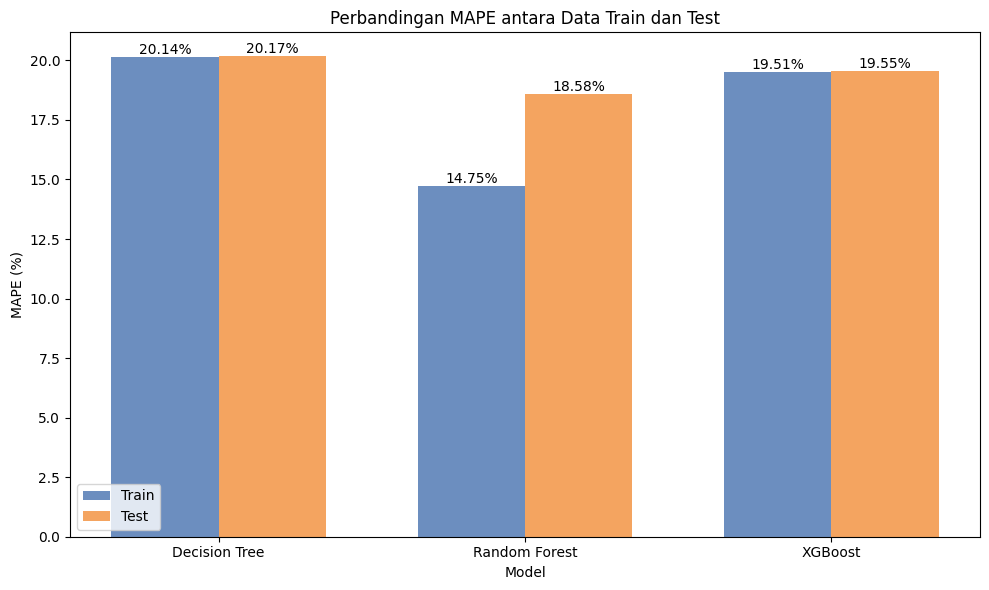

In [185]:
# Hasil evaluasi model
models = ['Decision Tree', 'Random Forest', 'XGBoost']
r2_train = [r2_dt_best_train, r2_rf_best_train, r2_xgb_best_train]
r2_test = [r2_dt_best_test, r2_rf_best_test, r2_xgb_best_test]
mape_train = [mape_dt_best_train, mape_rf_best_train, mape_xgb_best_train]
mape_test = [mape_dt_best_test, mape_rf_best_test, mape_xgb_best_test]

train_colors = ['#6c8ebf', '#6c8ebf', '#6c8ebf']  # Biru
test_colors = ['#f4a460','#f4a460','#f4a460']  # Oren

# Plot R-squared
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bars_train = plt.bar(index, r2_train, bar_width, color=train_colors, label='Train')
bars_test = plt.bar(index + bar_width, r2_test, bar_width, color=test_colors, label='Test')

plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Perbandingan R-squared antara Data Train dan Test')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Tambahkan nilai di atas batang R-squared
for bars in [bars_train, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(10, 6))

bars_train = plt.bar(index, mape_train, bar_width, color=train_colors, label='Train')
bars_test = plt.bar(index + bar_width, mape_test, bar_width, color=test_colors, label='Test')

plt.xlabel('Model')
plt.ylabel('MAPE (%)')
plt.title('Perbandingan MAPE antara Data Train dan Test')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Tambahkan nilai di atas batang MAPE
for bars in [bars_train, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## SAVE MODEL XGBoost TUNING

In [186]:
# Simpan model
import pickle
with open('best_xgb_model.sav', 'wb') as file:
    pickle.dump(best_model_xgb, file)

## FEATURES IMPORTANCE

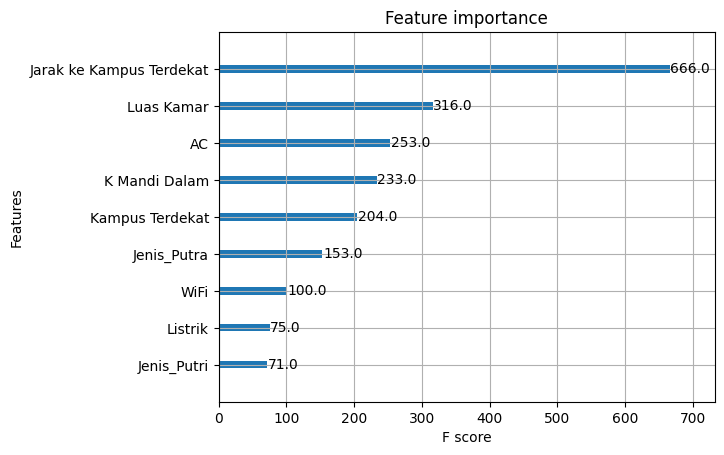

In [187]:
# Plot feature importance
from xgboost import plot_importance
plot_importance(best_model_xgb)
plt.show()